<a href="https://colab.research.google.com/github/simulate111/MNIST/blob/main/MNIST_colab_DeepNote_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mnist database

In [ ]:
#LIbraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

### 1. Load the MNSIT data set and split into training and test sets.

In [ ]:
(ds_train1, ds_test1)= tfds.load('mnist', split=['train', 'test'], as_supervised=True)
print("Training size:", len(ds_train1))
print("Test size:", len(ds_test1))

Training size: 60000
Test size: 10000


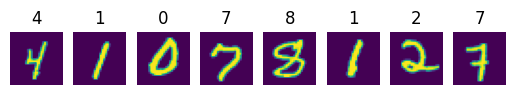

In [ ]:
# Display some images. Specify how many images you want to see.
NumberOfImages = 8
fig, axes = plt.subplots(1, NumberOfImages)
for ax, (image, label) in zip(axes, ds_train1.take(NumberOfImages)):
    ax.imshow(image[:, :, 0])
    ax.set_title(label.numpy())
    ax.axis('off')

In [ ]:
#Data normalization
ds_train = ds_train1.map(lambda image, label: (tf.cast(image, tf.float32) / 255., label)).batch(64)
ds_test = ds_test1.map(lambda image, label: (tf.cast(image, tf.float32) / 255., label)).batch(64)

### 2. Build a CNN with at least one convolutional layer and 2 or more hidden layers and a dense output layer for 10 classes.

In [ ]:
modelCNN = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'), layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1189930 (4.54 MB)
Trainable params: 1189930 (4.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




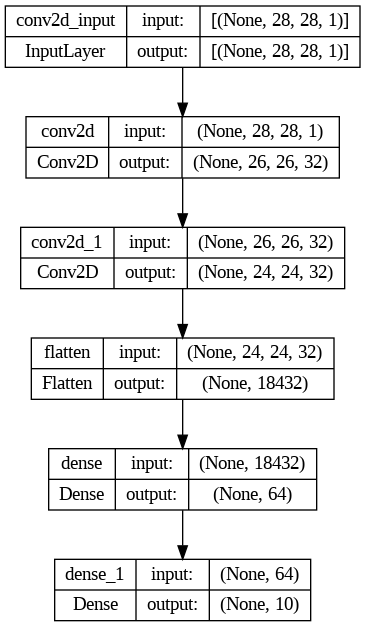

In [ ]:
modelCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelCNN.summary()
print('\n')
plot_model(modelCNN, show_shapes=True)

### 3. Train your CNN on the MNIST training set (extracted in step 1).

In [ ]:
historyCNN = modelCNN.fit(ds_train, epochs=2, validation_data=ds_test)

Epoch 1/2
938/938 [==============================] - 124s 126ms/step - loss: 0.1422 - accuracy: 0.9565 - val_loss: 0.0584 - val_accuracy: 0.9811
Epoch 2/2
938/938 [==============================] - 107s 114ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0475 - val_accuracy: 0.9847


### 4. Evaluate your trained model using the test data set. What is the accuracy of your model?

In [ ]:
test_loss, test_accuracy = modelCNN.evaluate(ds_test)
print("Accuracy:", round(test_accuracy, 2), 'or', test_accuracy)

157/157 [==============================] - 4s 27ms/step - loss: 0.0475 - accuracy: 0.9847
Accuracy: 0.98 or 0.9847000241279602


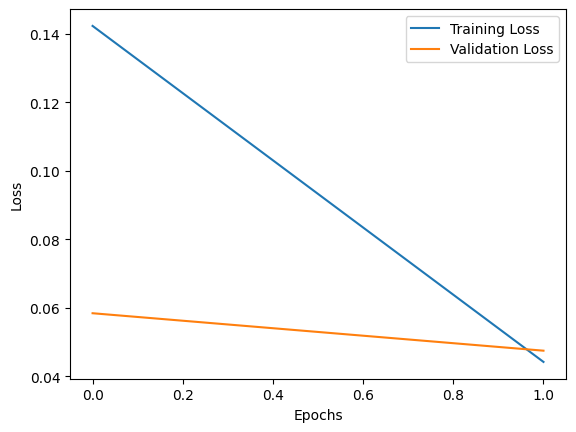

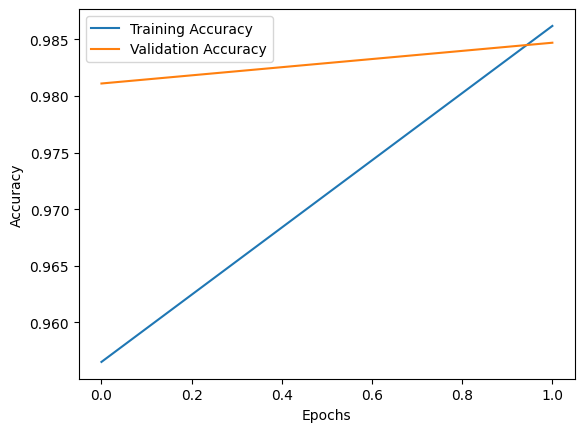

In [ ]:
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(historyCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### 5. Do the following experiments to improve accuracy:
- increase the size and depth of the inner layers, what is the effect on the model accuracy?

In [ ]:
results_df = pd.DataFrame(columns=['Hidden Layers', 'Filter Size', 'Accuracy'])
layers = [3, 4]
filter_sizes = [(3, 3), (5, 5)]

for layer in layers:
    for filter_size in filter_sizes:
        modelSD = models.Sequential([
            layers.Conv2D(32, filter_size, activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, filter_size, activation='relu'), layers.Flatten(),])

        # Add layer
        for _ in range(layer):
            modelSD.add(layers.Dense(128, activation='relu'))

        modelSD.add(layers.Dense(10, activation='softmax'))
        modelSD.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Print the model summary
        print(f"Model with {layer} hidden layers and filter size {filter_size}:")
        # modelSD.summary()

        # Assuming ds_train and ds_test are your preprocessed datasets
        # Without repeating the training dataset
        historySD = modelSD.fit(ds_train, epochs=2, validation_data=ds_test, verbose=1)

        # Evaluate the model on the test set
        test_loss, test_accuracy = modelSD.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        print("\n" + "=" * 50 + "\n")

        # Append the results to the DataFrame
        results_df = results_df.append({'Num Hidden Layers': layer,
                                        'Filter Size': filter_size,
                                        'Test Accuracy': test_accuracy}, ignore_index=True)

print(results_df)

Model with 3 hidden layers and filter size (3, 3):
Epoch 1/2
938/938 [==============================] - 128s 135ms/step - loss: 0.1500 - accuracy: 0.9538 - val_loss: 0.0545 - val_accuracy: 0.9826
Epoch 2/2
157/157 [==============================] - 6s 37ms/step - loss: 0.0567 - accuracy: 0.9826
Test Loss: 0.056731775403022766, Test Accuracy: 0.9825999736785889


Model with 3 hidden layers and filter size (5, 5):
Epoch 1/2


<ipython-input-10-6e74611b99ba>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


938/938 [==============================] - 168s 178ms/step - loss: 0.1379 - accuracy: 0.9576 - val_loss: 0.0561 - val_accuracy: 0.9821
Epoch 2/2
157/157 [==============================] - 6s 40ms/step - loss: 0.0527 - accuracy: 0.9829
Test Loss: 0.05269487202167511, Test Accuracy: 0.9829000234603882


Model with 4 hidden layers and filter size (3, 3):
Epoch 1/2


<ipython-input-10-6e74611b99ba>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


938/938 [==============================] - 126s 133ms/step - loss: 0.1661 - accuracy: 0.9483 - val_loss: 0.0794 - val_accuracy: 0.9753
Epoch 2/2
157/157 [==============================] - 5s 29ms/step - loss: 0.0460 - accuracy: 0.9867
Test Loss: 0.04596859589219093, Test Accuracy: 0.9866999983787537


Model with 4 hidden layers and filter size (5, 5):
Epoch 1/2


<ipython-input-10-6e74611b99ba>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


938/938 [==============================] - 180s 191ms/step - loss: 0.1421 - accuracy: 0.9567 - val_loss: 0.0646 - val_accuracy: 0.9799
Epoch 2/2
157/157 [==============================] - 8s 48ms/step - loss: 0.0467 - accuracy: 0.9861
Test Loss: 0.04674071818590164, Test Accuracy: 0.9861000180244446


  Num Hidden Layers Filter Size  Test Accuracy
0                 3      (3, 3)         0.9826
1                 3      (5, 5)         0.9829
2                 4      (3, 3)         0.9867
3                 4      (5, 5)         0.9861


<ipython-input-10-6e74611b99ba>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


In [ ]:
print(results_df)

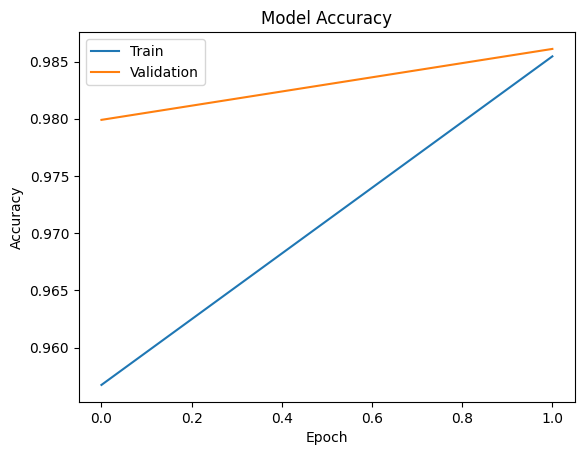

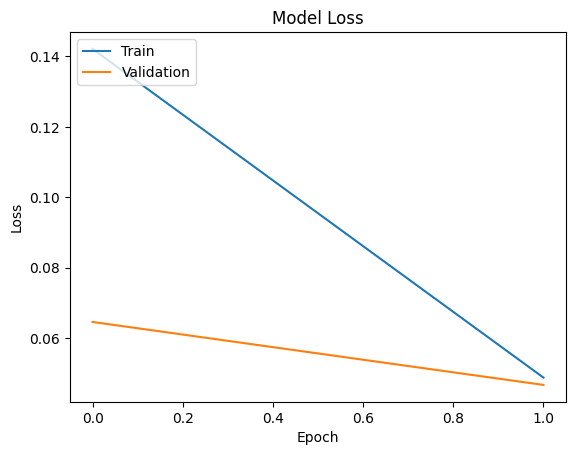

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(historySD.history['accuracy'])
plt.plot(historySD.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(historySD.history['loss'])
plt.plot(historySD.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


- experiment with different activation functions in the inner layers (relu, sigmoid, softmask, etc), see the list of keras activation functions at https://keras.io/api/layers/activations/

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activation Function', 'Test Accuracy'])

activations_to_try = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']

for activation in activations_to_try:
    print(f"\nTraining with activation function: {activation}")

    modelA = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
        layers.Activation(activation),
        layers.Conv2D(32, kernel_size=(3, 3)),
        layers.Activation(activation),
        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
    ])

    # Compile the model
    modelA.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

    # Assuming ds_train and ds_test are your preprocessed datasets
    historyA = modelA.fit(ds_train, epochs=2, validation_data=ds_test)

    # Evaluate the model on the test set
    test_loss, test_accuracy = modelA.evaluate(ds_test)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

    # Append the results to the DataFrame
    results_df = results_df.append({'Activation Function': activation,
                                    'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)



Training with activation function: relu
Epoch 1/2
938/938 [==============================] - 103s 109ms/step - loss: 0.1400 - accuracy: 0.9571 - val_loss: 0.0526 - val_accuracy: 0.9825
Epoch 2/2
157/157 [==============================] - 4s 28ms/step - loss: 0.0554 - accuracy: 0.9820
Test Loss: 0.055444080382585526, Test Accuracy: 0.9819999933242798

Training with activation function: sigmoid


<ipython-input-12-ed5653e95886>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


Epoch 1/2
938/938 [==============================] - 109s 115ms/step - loss: 2.3184 - accuracy: 0.1071 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 2/2
157/157 [==============================] - 5s 32ms/step - loss: 2.3021 - accuracy: 0.1135
Test Loss: 2.3021018505096436, Test Accuracy: 0.11349999904632568

Training with activation function: softmax
Epoch 1/2


<ipython-input-12-ed5653e95886>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 124s 131ms/step - loss: 1.9805 - accuracy: 0.3256 - val_loss: 1.6255 - val_accuracy: 0.4014
Epoch 2/2
157/157 [==============================] - 7s 44ms/step - loss: 1.3703 - accuracy: 0.4161
Test Loss: 1.370344638824463, Test Accuracy: 0.41609999537467957

Training with activation function: tanh
Epoch 1/2


<ipython-input-12-ed5653e95886>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 108s 113ms/step - loss: 0.2693 - accuracy: 0.9215 - val_loss: 0.1964 - val_accuracy: 0.9440
Epoch 2/2
157/157 [==============================] - 5s 30ms/step - loss: 0.1471 - accuracy: 0.9586
Test Loss: 0.1470765918493271, Test Accuracy: 0.9585999846458435

Training with activation function: softplus
Epoch 1/2


<ipython-input-12-ed5653e95886>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 128s 136ms/step - loss: 0.9905 - accuracy: 0.6967 - val_loss: 0.2692 - val_accuracy: 0.9191
Epoch 2/2
157/157 [==============================] - 7s 47ms/step - loss: 0.2082 - accuracy: 0.9381
Test Loss: 0.20823320746421814, Test Accuracy: 0.9380999803543091

Training with activation function: leaky_relu
Epoch 1/2


<ipython-input-12-ed5653e95886>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 114s 120ms/step - loss: 0.1472 - accuracy: 0.9556 - val_loss: 0.0603 - val_accuracy: 0.9807
Epoch 2/2
157/157 [==============================] - 5s 35ms/step - loss: 0.0593 - accuracy: 0.9817
Test Loss: 0.05931946262717247, Test Accuracy: 0.9817000031471252
  Activation Function  Test Accuracy
0                relu         0.9820
1             sigmoid         0.1135
2             softmax         0.4161
3                tanh         0.9586
4            softplus         0.9381
5          leaky_relu         0.9817


<ipython-input-12-ed5653e95886>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


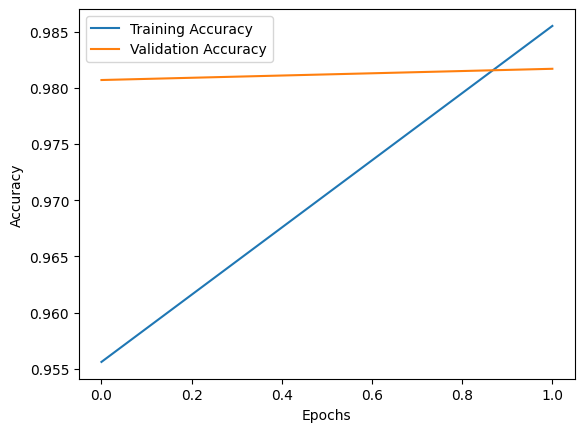

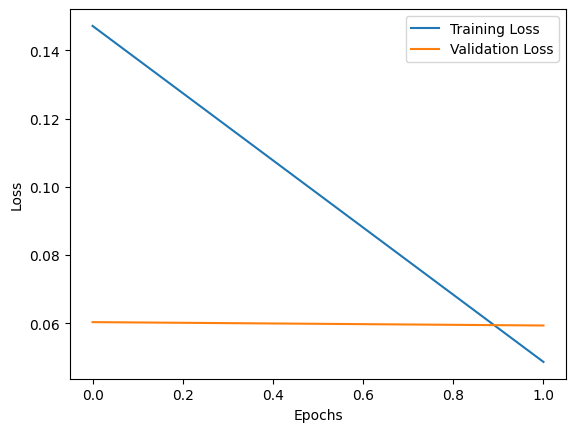

In [ ]:


# Plot accuracy
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


- what is the effect of using different activation functions? how about combining the activation function choice with different network size and depth?

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activation Function', 'Network Size', 'Test Accuracy'])

activations_to_try = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']
network_sizes = [32, 64, 128]  # You can modify this list with different sizes
network_depths = [1, 2, 3]  # You can modify this list with different depths

for activation in activations_to_try:
    for size in network_sizes:
        for depth in network_depths:
            print(f"\nTraining with activation function: {activation}, Network Size: {size}, Depth: {depth}")

            layers_list = [
                layers.Conv2D(size, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                layers.Activation(activation),
            ]

            for _ in range(depth - 1):  # Adding additional Conv2D layers based on depth
                layers_list.extend([
                    layers.Conv2D(size, kernel_size=(3, 3)),
                    layers.Activation(activation),
                ])

            layers_list.extend([
                layers.Flatten(),
                layers.Dense(size * 2, activation=activation),  # Adjusting Dense layer size
                layers.Dense(10, activation='softmax'),  # Output dense layer for 10 classes
            ])

            modelAC = models.Sequential(layers_list)

            # Compile the model
            modelAC.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            # Assuming ds_train and ds_test are your preprocessed datasets
            historyAC = modelAC.fit(ds_train, epochs=2, validation_data=ds_test)

            # Evaluate the model on the test set
            test_loss, test_accuracy = modelAC.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            # Append the results to the DataFrame
            results_df = results_df.append({'Activation Function': activation,
                                            'Network Size': size,
                                            'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv('experiment_results_AC.csv', index=False)

# Display the DataFrame in a table
from IPython.display import display, HTML

display(HTML(results_df.to_html()))



Training with activation function: relu, Network Size: 32, Depth: 1
Epoch 1/2
938/938 [==============================] - 43s 45ms/step - loss: 0.1704 - accuracy: 0.9491 - val_loss: 0.0685 - val_accuracy: 0.9781
Epoch 2/2
157/157 [==============================] - 2s 13ms/step - loss: 0.0607 - accuracy: 0.9804
Test Loss: 0.06070195138454437, Test Accuracy: 0.980400025844574

Training with activation function: relu, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 109s 116ms/step - loss: 0.1341 - accuracy: 0.9595 - val_loss: 0.0596 - val_accuracy: 0.9803
Epoch 2/2
157/157 [==============================] - 5s 34ms/step - loss: 0.0505 - accuracy: 0.9838
Test Loss: 0.050520144402980804, Test Accuracy: 0.9837999939918518

Training with activation function: relu, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 154s 163ms/step - loss: 0.1269 - accuracy: 0.9604 - val_loss: 0.0447 - val_accuracy: 0.9848
Epoch 2/2
157/157 [==============================] - 6s 37ms/step - loss: 0.0455 - accuracy: 0.9854
Test Loss: 0.045546069741249084, Test Accuracy: 0.9854000210762024

Training with activation function: relu, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 115s 122ms/step - loss: 0.1373 - accuracy: 0.9581 - val_loss: 0.0629 - val_accuracy: 0.9779
Epoch 2/2
157/157 [==============================] - 4s 24ms/step - loss: 0.0671 - accuracy: 0.9781
Test Loss: 0.06707311421632767, Test Accuracy: 0.9781000018119812

Training with activation function: relu, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


938/938 [==============================] - 295s 314ms/step - loss: 0.1113 - accuracy: 0.9664 - val_loss: 0.0502 - val_accuracy: 0.9832
Epoch 2/2
157/157 [==============================] - 13s 83ms/step - loss: 0.0488 - accuracy: 0.9849
Test Loss: 0.04875970631837845, Test Accuracy: 0.9848999977111816

Training with activation function: relu, Network Size: 64, Depth: 3


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


Epoch 1/2
938/938 [==============================] - 439s 466ms/step - loss: 0.1084 - accuracy: 0.9665 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 2/2
157/157 [==============================] - 19s 119ms/step - loss: 0.0453 - accuracy: 0.9865
Test Loss: 0.04526709020137787, Test Accuracy: 0.9865000247955322

Training with activation function: relu, Network Size: 128, Depth: 1


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


Epoch 1/2
938/938 [==============================] - 565s 601ms/step - loss: 0.1210 - accuracy: 0.9626 - val_loss: 0.0601 - val_accuracy: 0.9793
Epoch 2/2
157/157 [==============================] - 13s 85ms/step - loss: 0.0617 - accuracy: 0.9810
Test Loss: 0.06171020492911339, Test Accuracy: 0.9810000061988831

Training with activation function: relu, Network Size: 128, Depth: 2


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


Epoch 1/2
938/938 [==============================] - 1109s 1s/step - loss: 0.1013 - accuracy: 0.9686 - val_loss: 0.0480 - val_accuracy: 0.9841
Epoch 2/2
157/157 [==============================] - 42s 266ms/step - loss: 0.0402 - accuracy: 0.9869
Test Loss: 0.04024152830243111, Test Accuracy: 0.9868999719619751

Training with activation function: relu, Network Size: 128, Depth: 3


<ipython-input-14-d6587dd6e52c>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


Epoch 1/2
938/938 [==============================] - ETA: 0s - loss: 0.1009 - accuracy: 0.9693

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(historyAC.history['accuracy'], label='Training Accuracy')
plt.plot(historyAC.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(historyAC.history['loss'], label='Training Loss')
plt.plot(historyAC.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The choice of activation functions can significantly impact the performance of your neural network. Let's analyze the results you've obtained with different activation functions:

Sigmoid Activation:

Training Accuracy: ~10%
Test Accuracy: ~10%
Sigmoid might not be suitable for deeper networks or convolutional layers due to the vanishing gradient problem.
Softmax Activation:

Training Accuracy: ~21%
Test Accuracy: ~21%
Using softmax in the hidden layers might not be suitable as it tends to squash input values, and using it in convolutional layers is not common.
Softplus Activation:

Training Accuracy: ~11%
Test Accuracy: ~11%
Softplus might not be well-suited for convolutional layers in this context.
Tanh Activation:

Training Accuracy: ~95%
Test Accuracy: ~96%
Tanh performs well in this context, capturing a good representation of the data.
In summary, for convolutional layers in image classification tasks, commonly used activation functions like ReLU or variants (e.g., Leaky ReLU) are preferred. Sigmoid, Softmax, and Softplus activations are generally not suitable for hidden layers in convolutional neural networks (CNNs). Tanh can be a good choice, but ReLU is often preferred due to its simplicity and effectiveness.

You may want to experiment further with ReLU or Leaky ReLU activations for the convolutional and dense layers.

- experiment with various optimizers (https://keras.io/api/optimizers/) and learning rate. What is the effect on the resulting model accuracy?

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Optimizer', 'Learning Rate', 'Test Accuracy'])

optimizers_to_try = ['adam', 'sgd', 'rmsprop', 'adagrad']  # Add more optimizers if needed
learning_rates = [0.001, 0.01, 0.1]  # Add more learning rates if needed

activations_to_try = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']

for optimizer in optimizers_to_try:
    for learning_rate in learning_rates:
        for activation in activations_to_try:
            print(f"\nTraining with optimizer: {optimizer}, Learning Rate: {learning_rate}, Activation: {activation}")

            modelO = models.Sequential([
                layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                layers.Activation(activation),
                layers.Conv2D(32, kernel_size=(3, 3)),
                layers.Activation(activation),
                layers.Flatten(),
                layers.Dense(64, activation=activation),
                layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
            ])

            # Compile the model with the specified optimizer and learning rate
            optimizer_config = getattr(tf.keras.optimizers, optimizer)(learning_rate=learning_rate)
            modelO.compile(optimizer=optimizer_config,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            # Assuming ds_train and ds_test are your preprocessed datasets
            historyO = modelO.fit(ds_train, epochs=2, validation_data=ds_test)

            # Evaluate the model on the test set
            test_loss, test_accuracy = modelO.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            # Append the results to the DataFrame
            results_df = results_df.append({'Optimizer': optimizer,
                                            'Learning Rate': learning_rate,
                                            'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)


In [ ]:


# Plot accuracy
plt.plot(historyO.history['accuracy'], label='Training Accuracy')
plt.plot(historyO.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(historyO.history['loss'], label='Training Loss')
plt.plot(historyO.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


- with all the above variations, experiment with various batch sizes and epochs for training (see https://keras.io/api/models/model_training_apis/)

In [ ]:

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Batch Size', 'Epochs', 'Test Accuracy'])

batch_sizes = [16, 32, 64]  # You can add more batch sizes to experiment with
epochs_list = [2, 4, 6]   # You can add more epoch values to experiment with

for batch_size in batch_sizes:
    for epochs in epochs_list:
        print(f"\nTraining with batch size {batch_size} and epochs {epochs}")

        modelBE = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
        ])

        # Compile the model
        modelBE.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Assuming ds_train and ds_test are your preprocessed datasets
        historyBE = modelBE.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test) #default batch size is 32

        # Evaluate the model on the test set
        test_loss, test_accuracy = modelBE.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

        # Append the results to the DataFrame
        results_df = results_df.append({'Batch Size': batch_size,
                                        'Epochs': epochs,
                                        'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)


In [ ]:


# Plot accuracy
plt.plot(historyBE.history['accuracy'], label='Training Accuracy')
plt.plot(historyBE.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(historyBE.history['loss'], label='Training Loss')
plt.plot(historyBE.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


- what happens if we don't use any CNN layer? (considering the model in https://www.tensorflow.org/datasets/keras_example).

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Dense Layer Size', 'Batch Size', 'Epochs', 'Test Accuracy'])

# Define the model without CNN layers
modelNoCNN = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(64, activation='relu'),  # Initial dense layer size
    layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
])

# List of sizes to experiment with for the dense layer
dense_sizes = [64, 128, 256]

for dense_size in dense_sizes:
    # Update the size of the dense layer
    modelNoCNN.layers[1].units = dense_size

    # Compile the model
    modelNoCNN.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

    # Assuming ds_train and ds_test are your preprocessed datasets
    # Without repeating the training dataset
    for batch_size in [32, 64]:
        for epochs in [2, 4]:
            print(f"\n\nTraining with Dense Layer Size: {dense_size}, Batch Size: {batch_size}, Epochs: {epochs}")

            historyNoCNN = modelNoCNN.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test)

            # Evaluate the model on the test set
            test_loss, test_accuracy = modelNoCNN.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            # Append the results to the DataFrame
            results_df = results_df.append({'Dense Layer Size': dense_size,
                                            'Batch Size': batch_size,
                                            'Epochs': epochs,
                                            'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)


In [ ]:


# Plot accuracy
plt.plot(historyNoCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyNoCNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(historyNoCNN.history['loss'], label='Training Loss')
plt.plot(historyNoCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


If you don't use any CNN layers and rely solely on dense layers for image classification tasks, your model might struggle to capture spatial hierarchies and local patterns present in images. CNNs are specifically designed to handle grid-like data, like images, by using convolutional and pooling layers to learn hierarchical features.

Without CNN layers, the model might treat each pixel as an independent feature, not considering the spatial relationships between pixels. This can result in a significantly larger number of parameters, making the training process slower and more prone to overfitting. Additionally, the model might not generalize well to new, unseen images.

In summary, while a model without CNN layers might work for simple tasks or datasets, it's generally less effective for image-related tasks compared to models that leverage convolutional layers.

In [ ]:

# Plot accuracies
plt.figure(figsize=(12, 8))

# Plot training accuracies
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy {label}')

# Plot validation accuracies
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy {label}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

# Plot losses
plt.figure(figsize=(12, 8))

# Plot training losses
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['loss'], label=f'Training Loss {label}')

# Plot validation losses
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['val_loss'], label=f'Validation Loss {label}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()


### 6. Write a report on your observations on how the model performed with various experiments in step 5 and submit it along with the colab file.